# Задание 1
Вычислите евклидово расстояние между кластером c1 и кластером c3. Это расстояние получилось меньше, или больше чем расстояние между кластером c1 и кластером c2?   

   Координаты центра для трёх кластеров:

* "красный" кластер  c1=[1.0,1.5] 
* "оранжевый" кластер  c2=[−1.0,−0.5] 
* "зеленый" кластер  c3=[1.0,−0.5]

In [1]:
from scipy.spatial.distance import euclidean

In [2]:
c1 = [1.0,1.5]
c2 = [-1.0,-0.5]
c3 = [1.0,-0.5]

In [3]:
euclidean(c1,c3)

2.0

In [4]:
euclidean(c1,c2)

2.8284271247461903

**Меньше**

# 2.1 Домашнее задание начального уровня
Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива  X  до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции sklearn.metrics.pairwise.euclidean_distances из первого урока. В итоге у Вас должно получиться число чуть более  16  - это и будет расстояние.   
   ∑i=1k∣xi−c∣ 

где для одного обучающего примера x, состоящего из двух координат:   
   ∣x−c∣=(x1−c1)2+(x2−c2)2

Примечание Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.   

   Подсказка Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [5]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])


In [6]:
((clust[:, 0] - centroid[0])**2 + (clust[:, 1] - centroid[1]) **2) # расстояния от кажой точки до центра кластера

array([0.45734407, 0.62471714, 2.38616357, 0.12574671, 5.29987157,
       1.53908482, 2.23478489, 2.19876611, 0.18668838, 1.25894971])

In [7]:
((clust[:, 0] - centroid[0])**2 + (clust[:, 1] - centroid[1]) **2).sum()

16.31211696438564

# 2.2 Домашнее задание начального уровня
Обучите алгоритм k-средних для количества кластеров  n=3  на том же датасете, который содержится в файле data/clustering.pkl. Визуализируйте результат:

In [8]:
import pickle

In [9]:
with open('clustering.pkl', 'rb') as data:
    dataset = pickle.load(data)

In [10]:
X = dataset['X']
Y = dataset['Y']

In [11]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters = 3).fit(X)

In [13]:
km.labels_

array([1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1], dtype=int32)

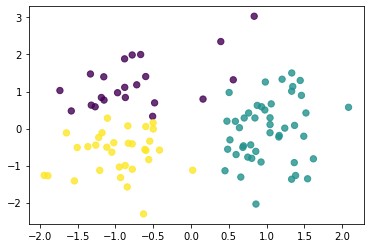

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=40, c=km.labels_, marker='o', alpha=0.8, label='data')
plt.show()

# 2.3 Домашнее задание высокого уровня   
Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.   

   Попробуйте применить эту эвристику на практике:
* используйте 10 запусков алгоритма  k -средних для  k=2  с параметрами   
   kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
* в каждом запуске сохраняйте координаты центроидов общий массив  c . См. cluster_centers_ : array, [n_clusters, n_features]
* визуализируйте координаты точек из  c  на фоне исходного множества точек


In [15]:
lst = []
for i in range(10):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2).fit(X)
    lst.extend(kmeans_model.cluster_centers_)
else:
    lst = np.array(lst)

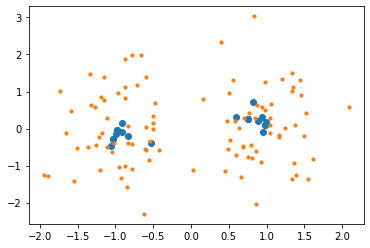

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(lst[:,0], lst[:,1])
plt.scatter(X[:,0], X[:,1], s=10)
plt.show()

# Домашнее задание начального уровня (3 ???)
Обучите модель DBSCAN с параметром min_samples=8. Визуализируйте результат.

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
db = DBSCAN(min_samples=8).fit(X)

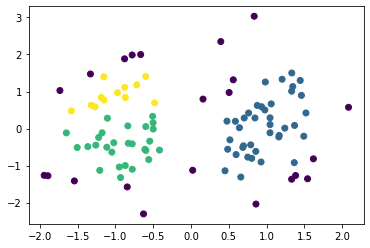

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=db.labels_)
plt.show()

# 4.1 Задание начального уровня
Обучите k-means для количества кластеров  k=4  на датасете data/clustering.pkl.    
   Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [20]:
km = KMeans(n_clusters=4).fit(X)

In [21]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, km.labels_)

In [22]:
score

0.4417501080615704

In [23]:
km = KMeans(n_clusters=2).fit(X)
score = silhouette_score(X, km.labels_)

In [24]:
score

0.4465356047465253

**Уменьшилась, стало хуже, лучше 2 кластера**

# 4.2 Задание начального уровня
Обучите k-means для количества кластеров  k=4  на датасете data/clustering.pkl. Как изменилась метрика AMI? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [25]:
km = KMeans(n_clusters=4).fit(X)

In [26]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(Y, km.labels_, average_method='arithmetic')

In [27]:
score

0.5827727212133398

**Ухудшилась по сравнению с показанным в уроке**

In [28]:
km = KMeans(n_clusters=2).fit(X)

In [29]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(Y, km.labels_, average_method='arithmetic')

In [30]:
score

0.9286022516535728

**Лучше всего 2**

# 4.3 Задание высокого уровня
Загрузите датасет clustering_hw.csv из приложенной директории data и визуализируйте данные.   

   В рамках домашней работы:

* вычислите оптимальное количество кластеров  k 
* обучите k-means с количеством кластеров  k 
* к какому кластеру принадлежит точка  x=(5,8) ? к какому кластеру принадлежит точка  x=(0,5) ? Они принадлежат к разным кластерам или одному?
* Каково качество кластеризации по AMI

In [31]:
import pandas as pd
df = pd.read_csv('7.10_clustering_hw.csv')

In [32]:
X = np.array(df[['x1', 'x2']])

In [33]:
Y = np.array(df['y'])

In [34]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.897378110108
cluster_num 2, metric 663.5712032768098
cluster_num 3, metric 374.6589714184063
cluster_num 4, metric 348.17052724059613
cluster_num 5, metric 323.0909288942993
cluster_num 6, metric 300.10388486033395


best cluster num: 3


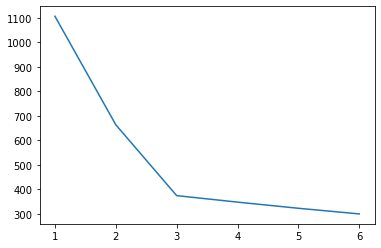

In [35]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

**Оптимальное количество кластеров == 3**

In [36]:
km = KMeans(n_clusters=3).fit(X)

In [37]:
km.predict(np.array([5,8]).reshape(1,-1))

array([1], dtype=int32)

In [38]:
km.predict(np.array([0,5]).reshape(1,-1))

array([2], dtype=int32)

**К разным**

In [39]:
score = adjusted_mutual_info_score(Y, km.labels_, average_method='arithmetic')

In [40]:
score

0.9700074953683859